In [9]:
import numpy as np
import h5py
from six.moves import range
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
f = h5py.File('me1Amc_zzpredpluskine.hdf5', 'r')
print('n events = {}'.format(len(f['eventids'])))
for name in f:
    print(name)

n events = 433255
Q2
W
current
eventids
int_type
lepE
nuE
planecodes_actual
planecodes_pred
targZ
xbj
ybj


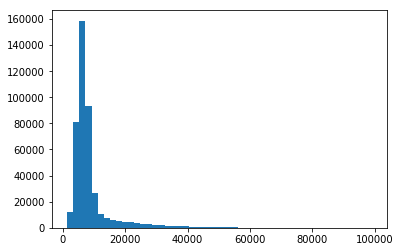

In [12]:
n, bins, patches = plt.hist(f['nuE'], bins=50)

In [13]:
arr_all = np.zeros(shape=(67, 67))
arr_lowQ2 = np.zeros(shape=(67, 67))
arr_highQ2 = np.zeros(shape=(67, 67))
arr_lowW = np.zeros(shape=(67, 67))
arr_highW = np.zeros(shape=(67, 67))
arr_lowE = np.zeros(shape=(67, 67))
arr_highE = np.zeros(shape=(67, 67))

In [14]:
n_events = f['eventids'].shape[0]
# n_events = 100
print('n events = {}'.format(n_events))

n_lowQ2 = 0.
n_highQ2 = 0.
n_lowW = 0.
n_highW = 0.
n_lowE = 0.
n_highE = 0.

for i in range(n_events):
    pred = f['planecodes_pred'][i]
    actl = f['planecodes_actual'][i]
#    if pred == 66 and actl == 66:
#        continue
    arr_all[actl, pred] += 1.0
    if f['Q2'][i] < 1.0e6:
        arr_lowQ2[actl, pred] += 1.0
        n_lowQ2 += 1.0
    else:
        arr_highQ2[actl, pred] += 1.0
        n_highQ2 += 1.0
    if f['W'][i] < 1.3e3:
        arr_lowW[actl, pred] += 1.0
        n_lowW += 1.0
    else:
        arr_highW[actl, pred] += 1.0
        n_highW += 1.0
    if f['nuE'][i] < 7.0e3:
        arr_lowE[actl, pred] += 1.0
        n_lowE += 1.0
    else:
        arr_highE[actl, pred] += 1.0
        n_highE += 1.0


        
print('n low Q2 = {} ({})'.format(n_lowQ2, n_lowQ2 / n_events))
print('n high Q2 = {} ({})'.format(n_highQ2, n_highQ2 / n_events))
print('n low W = {} ({})'.format(n_lowW, n_lowW / n_events))
print('n high W = {} ({})'.format(n_highW, n_highW / n_events))
print('n low E = {} ({})'.format(n_lowE, n_lowE / n_events))
print('n high E = {} ({})'.format(n_highE, n_highE / n_events))


np.save('arr_all.npy', arr_all)
np.save('arr_lowQ2.npy', arr_lowQ2)
np.save('arr_highQ2.npy', arr_highQ2)
np.save('arr_lowW.npy', arr_lowW)
np.save('arr_highW.npy', arr_highW)
np.save('arr_lowE.npy', arr_lowE)
np.save('arr_highE.npy', arr_highE)

n events = 433255
n low Q2 = 299384.0 (0.691011067385)
n high Q2 = 133871.0 (0.308988932615)
n low W = 147739.0 (0.340997795755)
n high W = 285516.0 (0.659002204245)
n low E = 236148.0 (0.545055452332)
n high E = 197107.0 (0.454944547668)


In [15]:
def miss_fracs(arr):
    arr_total = np.sum(arr)
    true_downstrm_miss = np.sum(arr[66,0:65])   # real 66 reco'd elsewhere
    true_downstrm_miss_frac = true_downstrm_miss / arr_total
    pred_downstrm_miss = np.sum(arr[0:65,66])   # real target region reco'd downstream
    pred_downstrm_miss_frac = pred_downstrm_miss / arr_total
    print('true down miss = {}, pred down miss = {}'.format(
        true_downstrm_miss_frac, pred_downstrm_miss_frac
    ))

In [17]:
ll = list(zip(['all', 'lowQ2', 'highQ2', 'lowW', 'highW', 'lowE', 'highE'],
              [arr_all, arr_lowQ2, arr_highQ2, arr_lowW, arr_highW, arr_lowE, arr_highE]))
for a in ll:
    print(a[0])
    miss_fracs(a[1])

all
true down miss = 0.0012002169623, pred down miss = 0.0166853238855
lowQ2
true down miss = 0.00124255137215, pred down miss = 0.0151310691286
highQ2
true down miss = 0.00110554190228, pred down miss = 0.0201611999612
lowW
true down miss = 0.00104237878962, pred down miss = 0.0155138453624
highW
true down miss = 0.0012818896314, pred down miss = 0.0172915003012
lowE
true down miss = 0.0012746243881, pred down miss = 0.0180395345292
highE
true down miss = 0.00111107165144, pred down miss = 0.0150628846261
